<a href="https://colab.research.google.com/github/kabeerbora/1980s_delin/blob/main/1980s_delicensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages

In [2]:
import pandas as pd
!pip install pyreadstat

# Data ETL

In [3]:
%%time
import pandas as pd
import pyreadstat
import os

from google.colab import drive
drive.mount('/content/drive')

folder_range = range(1976, 1983)
folder_range_1 = range(1983, 1989)
# Create an empty dictionary to store DataFrames
dfs = []
for year in folder_range:
    folder_name = f"{year}_{year+1}"
    folder_path = f"/content/drive/MyDrive/data_economics_research/ASI_Firms/{folder_name}"
    if os.path.exists(folder_path):  # checking if path exits or not
        for filename in os.listdir(folder_path):
            if filename.endswith(".sav") and (filename.startswith("ASI") or filename.startswith("ASISUM")):
                file_path = os.path.join(folder_path, filename)
                df, meta = pyreadstat.read_sav(file_path, apply_value_formats=True)
                dfs.append(df)
for year in folder_range_1:
    folder_name = f"{year}_{year+1}"
    folder_path = f"/content/drive/MyDrive/data_economics_research/ASI_Firms/{folder_name}"
    if os.path.exists(folder_path):  # checking if path exits or not
        for filename in os.listdir(folder_path):
            if filename.endswith(".sav") and (filename.startswith("ASI") or filename.startswith("ASISUM")):
                file_path = os.path.join(folder_path, filename)
                df, meta = pyreadstat.read_sav(file_path, apply_value_formats=True)
                dfs.append(df)
df_final = pd.concat(dfs).reset_index(drop=True)
df_final
# df_1 = dfs['ASISUM_7677']
# df_2 = dfs['ASISUM_7778']
# df_3 = dfs['ASISUM_7980']
# df_4 = dfs['ASISUM_8081']
# df_5 = dfs['ASISUM_8182']
# df_6 = dfs['ASISUM_8586']
# df_7 = dfs['ASI_Summary_86_87']
# df_8 = dfs['ASI_Summary_87_88']
# df_9 = dfs['ASI_Summary_88_89']

Mounted at /content/drive
CPU times: user 24 s, sys: 2.42 s, total: 26.4 s
Wall time: 46.1 s


,Part_CD,Itm2,State,S_No,IND_CD,WGT,Itm12,Itm14,Itm15,Itm16,...,Itm104,Itm105,Itm106,Itm107,Itm108,Itm33a,Itm109,MSchm_CD,Itm34a,Itm10
0,Delhi,3,RAJASTHAN,7.0,2010.0,1.0,1976-77,0,703.0,Wholly State and/or Local Government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Delhi,3,RAJASTHAN,10.0,2010.0,1.0,1976-77,0,703.0,Joint Sector Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Delhi,3,RAJASTHAN,90035.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Delhi,3,RAJASTHAN,90034.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Delhi,3,RAJASTHAN,90055.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660756,Delhi,NaN,DAMAN & DIU,15012.0,9730.0,NaN,1988-89,26.0,12.0,Wholly private Ownership,...,0.0,0.0,0.0,0.0,9500.0,NaN,NaN,NaN,NaN,9740.0
660757,Delhi,NaN,DAMAN & DIU,15032.0,9740.0,NaN,1988-89,26.0,12.0,Wholly State and/or Local Government,...,0.0,0.0,0.0,0.0,15320.0,NaN,NaN,NaN,NaN,9740.0
660758,Delhi,NaN,DAMAN & DIU,14906.0,9740.0,NaN,1988-89,26.0,12.0,Wholly private Ownership,...,0.0,0.0,0.0,0.0,3085.0,NaN,NaN,NaN,NaN,9740.0
660759,Delhi,NaN,DAMAN & DIU,14933.0,9740.0,NaN,1988-89,26.0,12.0,Wholly private Ownership,...,0.0,0.0,0.0,0.0,1200.0,NaN,NaN,NaN,NaN,9740.0


## Applying meta labels to columns

In [4]:
column_labels = meta.column_names_to_labels
df_final.columns = [column_labels.get(col, col) for col in df_final.columns]
df_final.head(5)

,Part Code,Itm2,State Code,Running Serial No,NIC-70(1) Original NIC70,WGT,Year of Survey,Dummy State Code,Region Code,Ownership Code,...,Distributive Expenses,Value of Electricity Sold,Quantity of Electricity Produced (K.W.H.),Quantity of Electricity Sold (K.W.H.),Quantity of Electricity Consumed (K.W.H.),Itm33a,Itm109,MSchm_CD,Itm34a,NIC87
0,Delhi,3,RAJASTHAN,7.0,2010.0,1.0,1976-77,0,703.0,Wholly State and/or Local Government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Delhi,3,RAJASTHAN,10.0,2010.0,1.0,1976-77,0,703.0,Joint Sector Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Delhi,3,RAJASTHAN,90035.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Delhi,3,RAJASTHAN,90034.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Delhi,3,RAJASTHAN,90055.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Finding zeroes and NANs, and checking for number of observations by year

In [5]:
for column in df_final.columns:
    zero_count = df_final[column][(df_final[column] == 0) | (df_final[column].isnull())].count()
    print(f"Column '{column}': {zero_count} zeros and NaNs")

#Variable count by year
def count_zeros_nans(series):
  """Counts zeros and NaNs in a pandas Series."""
  num_zeros = (series == 0).sum()
  num_nans = series.isnull().sum()
  return num_zeros + num_nans

# Calculate and print the counts
gross_sale_zeros_nans_by_year = df_final.groupby('Year of Survey')['Total Output'].agg(count_zeros_nans).reset_index()
district_code_zeros_nans_by_year = df_final.groupby('Year of Survey')['District Code'].agg(count_zeros_nans).reset_index()
wages_workers_zeros_nans_by_year = df_final.groupby('Year of Survey')['Wages to Workers  (Including Bonus to Workers)'].agg(count_zeros_nans).reset_index()
value_added_zeros_nans_by_year = df_final.groupby('Year of Survey')['Fixed Capital ( Closing )'].agg(count_zeros_nans).reset_index()
surplus_value_zeros_nans_by_year = df_new.groupby('year')['rop'].agg(count_zeros_nans).reset_index()

print(surplus_value_zeros_nans_by_year)

Column 'Part Code': 0 zeros and NaNs
Column 'Itm2': 0 zeros and NaNs
Column 'State Code': 0 zeros and NaNs
Column 'Running Serial No': 5 zeros and NaNs
Column 'NIC-70(1) Original NIC70': 0 zeros and NaNs
Column 'WGT': 399 zeros and NaNs
Column 'Year of Survey': 0 zeros and NaNs
Column 'Dummy  State  Code': 50871 zeros and NaNs
Column 'Region Code': 55506 zeros and NaNs
Column 'Ownership Code': 0 zeros and NaNs
Column 'Organisation Code': 0 zeros and NaNs
Column 'Management Code': 0 zeros and NaNs
Column 'Scheme Code': 0 zeros and NaNs
Column 'District Code': 0 zeros and NaNs
Column 'Block Code': 428217 zeros and NaNs
Column 'Serial No. as given in Schedules': 0 zeros and NaNs
Column 'Permanent Serial No': 4 zeros and NaNs
Column 'Location Code': 0 zeros and NaNs
Column 'Area Code': 0 zeros and NaNs
Column 'Year of Initial Production': 28773 zeros and NaNs
Column 'Year of Initial Production Code': 0 zeros and NaNs
Column 'Open-Close Code': 0 zeros and NaNs
Column 'Power Code': 0 zeros a

NameError: name 'df_new' is not defined

In [ ]:
observations_by_year = df_new.groupby('year').size().reset_index(name='Number of Observations')
observations_by_year

,year,Number of Observations
0,1976-77,18857
1,1977-78,18880
2,1979-80,21681
3,1980-81,21896
4,1981-82,22892
5,1982-83,24260
6,1983-84,22915
7,1984-85,23518
8,1985-86,23906
9,1986-87,25005


# Creating variables

In [42]:
df_new = df_final[['Year of Survey', 'District Code', 'State Code', 'Total Output', 'Ownership Code', 'Wages to Workers  (Including Bonus to Workers)', 'No. of Factories', 'Value Added', 'Fixed Capital ( Closing )', 'NIC-70(1) Original NIC70']].copy()
df_new = df_new.dropna(subset=['Total Output', 'Wages to Workers  (Including Bonus to Workers)', 'Value Added', 'Fixed Capital ( Closing )'])
df_new = df_new[(df_new['Total Output'] != 0) & (df_new['Wages to Workers  (Including Bonus to Workers)'] != 0) & (df_new['Value Added'] != 0) & (df_new['Fixed Capital ( Closing )'] != 0)]
df_new['surplus_value'] = df_new['Value Added'] - df_new['Wages to Workers  (Including Bonus to Workers)']
df_new['rop'] = df_new['surplus_value']/df_new['Fixed Capital ( Closing )']
df_new = df_new[(df_new['rop'] > 0) & (df_new['rop'] < 1)]
df_new['rop'].describe()
df_new
df_new = df_new[df_new['surplus_value'] > 0]
df_new = df_new.rename(columns={'No. of Factories' : 'no_fact','Ownership Code' : 'ownership', 'Wages to Workers  (Including Bonus to Workers)': 'wages_workers', 'NIC-70(1) Original NIC70': 'nic_code', 'Fixed Capital ( Closing )': 'fixed_k', 'Year of Survey': 'year', 'District Code': 'district', 'State Code':'state', 'Total Output':'output'})
df_new['nic_code'] = df_new['nic_code'].astype(str).str[:3]


ValueError: invalid literal for int() with base 10: '1976-77'

## Addressing 'year'

In [48]:
df_new['year'] = df_new['year'].astype(str).str[:4]
df_new['year'] = df_new['year'].astype(int)
df_new = df_new[df_new['year'] >= 1979]
df_new

,year,district,state,output,ownership,wages_workers,no_fact,Value Added,fixed_k,nic_code,surplus_value,rop,delin_sector
101383,1979,6.0,RAJASTHAN,68536848.0,Wholly Private Enterprise,957614.0,1.0,2685546.0,10333712.0,201,1727932.0,0.167213,1
101385,1979,12.0,RAJASTHAN,28005013.0,Wholly Private Enterprise,352836.0,1.0,2333328.0,4350532.0,201,1980492.0,0.455230,1
101386,1979,12.0,RAJASTHAN,2579210.0,Joint Sector Public,59568.0,1.0,129823.0,1156806.0,201,70255.0,0.060732,1
101392,1979,1.0,RAJASTHAN,18630.0,Wholly Private Enterprise,3600.0,1.0,10125.0,13950.0,204,6525.0,0.467742,0
101393,1979,1.0,RAJASTHAN,24776.0,Wholly Private Enterprise,8400.0,1.0,18435.0,29315.0,204,10035.0,0.342316,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
660751,1988,1.0,DAMAN & DIU,41543197.0,Wholly private Ownership,2085656.0,1.0,4907459.0,6509192.0,383,2821803.0,0.433510,1
660752,1988,1.0,DAMAN & DIU,368873428.0,Wholly State and/or Local Government,26066271.0,1.0,53422314.0,300214537.0,400,27356043.0,0.091122,0
660754,1988,1.0,DAMAN & DIU,29101052.0,Wholly State and/or Local Government,1303489.0,1.0,1783141.0,7833581.0,420,479652.0,0.061230,0
660755,1988,1.0,DAMAN & DIU,956817.0,Wholly private Ownership,98564.0,1.0,165188.0,356326.0,741,66624.0,0.186975,0


# Assigning treatment

In [51]:
delin_sector = [274, 269, 268, 267, 266, 265, 264, 262, 261, 260, 259, 258, 257, 254, 250, 248, 247, 246, 245, 243, 242, 241, 240, 236, 235, 234, 233, 232, 231, 230, 224, 218, 216, 215, 214, 213, 209, 208, 205, 201, 200, 389, 387, 386, 385, 384, 383, 382, 381, 379, 378, 372, 370, 362, 361, 349, 345, 340, 336, 335, 334, 333, 332, 329, 326, 325, 324, 317, 311, 303, 301, 296, 295, 291, 288, 287, 284, 279, 277, 276, 275]
df_new['delin_sector'] = 0
df_new.loc[df_new['nic_code'].isin(map(str, delin_sector)), 'delin_sector'] = 1
df_new

,year,district,state,output,ownership,wages_workers,no_fact,Value Added,fixed_k,nic_code,surplus_value,rop,delin_sector
157841,1980,2.0,RAJASTHAN,10690363.0,Wholly State and/or Local Government,60265.0,1.0,85579.0,257850.0,201,25314.0,0.098173,1
157842,1980,2.0,RAJASTHAN,36462526.0,Joint Sector Private,368824.0,1.0,2742352.0,2788870.0,201,2373528.0,0.851072,1
157843,1980,6.0,RAJASTHAN,77328016.0,Wholly Private Enterprise,807352.0,1.0,9048421.0,9162289.0,201,8241069.0,0.899455,1
157845,1980,11.0,RAJASTHAN,25742199.0,Joint Sector Public,512443.0,1.0,1139531.0,3968812.0,201,627088.0,0.158004,1
157849,1980,15.0,RAJASTHAN,2946498.0,Joint Sector Public,51976.0,1.0,97439.0,565310.0,201,45463.0,0.080421,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
660751,1988,1.0,DAMAN & DIU,41543197.0,Wholly private Ownership,2085656.0,1.0,4907459.0,6509192.0,383,2821803.0,0.433510,1
660752,1988,1.0,DAMAN & DIU,368873428.0,Wholly State and/or Local Government,26066271.0,1.0,53422314.0,300214537.0,400,27356043.0,0.091122,0
660754,1988,1.0,DAMAN & DIU,29101052.0,Wholly State and/or Local Government,1303489.0,1.0,1783141.0,7833581.0,420,479652.0,0.061230,0
660755,1988,1.0,DAMAN & DIU,956817.0,Wholly private Ownership,98564.0,1.0,165188.0,356326.0,741,66624.0,0.186975,0


In [53]:
average_rop_by_delin_sector_year = df_new.groupby(['year', 'delin_sector'])['rop'].mean().unstack()
average_rop_by_delin_sector_year

delin_sector,0,1
year,,
1980,0.461947,0.449242
1981,0.456808,0.439331
1982,0.446850,0.434599
1983,0.432569,0.423066
1984,0.431404,0.423028
1985,0.439631,0.430558
1986,0.438248,0.422784
1987,0.436335,0.412050
1988,0.439550,0.413214


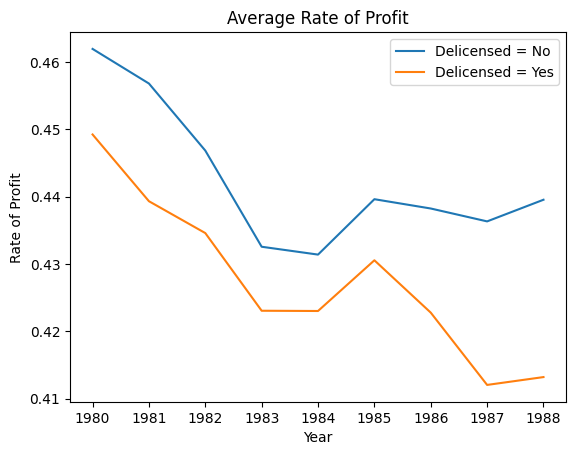

In [56]:
import matplotlib.pyplot as plt

# Assuming 'average_rop_by_delin_sector_year' is defined as in your code
# ... (your previous code)

# Plot the data with two separate lines
plt.plot(average_rop_by_delin_sector_year.index, average_rop_by_delin_sector_year[0], label='Delicensed = No')
plt.plot(average_rop_by_delin_sector_year.index, average_rop_by_delin_sector_year[1], label='Delicensed = Yes')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rate of Profit')
plt.title('Average Rate of Profit')

# Add legend
plt.legend()

# Show the plot
plt.show()